Импортириуем все необходимые для работы библиотеки

Произведем загрузку файла в notebook

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Считаем df и посмотрим на данные нам значения

In [12]:
df = pd.read_csv('https://raw.githubusercontent.com/Magillan17/Junior-ML-Contest/main/data_diplom.csv.csv', )
display(df.head())


,орудие преступления,тип преступления,способ совершения преступления,мотив преступления,обстановка преступления,количество жертв,возраст жертвы,пол жертвы,возраст преступника,образование преступника,семейный статус преступника,тип преступника,психотип преступника,наличие психического расстройства у преступника,пол преступника,профессия преступника
0,голые руки,"убийство, ограбление",сбрасывание с высоты,корыстный,город,70,от 15 до 30,мж,30,среднее,нет,меркантильный,социально дезадаптивный,нет,м,нет
1,инсулин,убийство,отравление,привлечение внимания,больница,4,"от 0,2 до 11",мж,23,среднее профессиональное,нет,властолюбец,социально дезадаптивный,сильное,ж,медсестра
2,голые руки,"убийство, изнасилование, некрофилия",удушение,"сексуальный, корыстный",город,15,от 13 до 20,ж,20,среднее профессиональное,нет,гедонист,социально адаптивный,среднее,м,"грузчик, военнослужащий"
3,голые руки,"убийство, изнасилование",удушение,сексуальный,лес,53,от 7 до 40,мж,18-30,начальное,нет,властолюбец,социально дезадаптивный,среднее,м,нет
4,голые руки,"убийство, изнасилование",удушение,сексуальный,город,3,от 10 до 11,ж,неизвестно,неизвестно,неизвестно,гедонист,социально адаптивный,сильное,м,неизвестно


In [13]:
df.shape

(185, 16)

Как мы видим - все признаки (столбцы, написанный русскими символами). Чтобы не возникали проблем при дальнейшей работе алгоритма, переименуем признаки(features).

In [14]:
df.columns

Index(['орудие преступления', 'тип преступления',
       'способ совершения преступления', 'мотив преступления',
       'обстановка преступления', 'количество жертв', 'возраст жертвы',
       'пол жертвы', 'возраст преступника', 'образование преступника',
       'семейный статус преступника', 'тип преступника',
       'психотип преступника',
       'наличие психического расстройства у преступника', 'пол преступника',
       'профессия преступника'],
      dtype='object')

In [15]:
df = df.rename(columns = {'орудие преступления':'weapon',
                          'тип преступления':'type_weapon',
                          'способ совершения преступления':'way_weapon',
                          'мотив преступления':'motive_weapon',
                          'обстановка преступления':'place',
                          'количество жертв':'amount of victims',
                          'возраст жертвы':'age of victim',
                          'пол жертвы':'gender of the victim',
                          'возраст преступника':'age of the criminal',
                          'образование преступника':'criminal education',
                          'семейный статус преступника': 'm.s. criminal',
                          'тип преступника':'type_cr',
                          'психотип преступника':'psychotype_cr',
                          'наличие психического расстройства у преступника':'psycho_cr',
                          'пол преступника':'gender_cr',
                          'профессия преступника':'profession_cr',
                          })


In [16]:
df.columns

Index(['weapon', 'type_weapon', 'way_weapon', 'motive_weapon', 'place',
       'amount of victims', 'age of victim', 'gender of the victim',
       'age of the criminal', 'criminal education', 'm.s. criminal', 'type_cr',
       'psychotype_cr', 'psycho_cr', 'gender_cr', 'profession_cr'],
      dtype='object')

В основном наши данные состоят из категориальных признаков. Нейронные сети не умеет работать с категориальными признаками. 
(На самом деле предобученные модели машинного обучения, по типу CatBoost умеет самостоятельно обрабатывать данные, но наша задача, написать собственную нейросеть, 
 а не использовать решения "из коробки"). Предообратаем данные для нейросети в виде числовых значений.
Рассмотрим каждый из признаков в отдельности, по насыщенности, колличеству уникальных и пропущенных значений

In [17]:
print(df.weapon.nunique())
print(df.weapon.unique())

78
['голые руки' 'инсулин' 'топор, обрез, молоток, нож, веревка'
 'шлейки сумки, рукава куртки, шнурок' 'лекарство, яд' 'пистолет'
 'чулок, лом, верёвка, пила, верёвка, нож'
 'электрошокер, верёвка, соляная кислота, нож, плоскогубцы, щипцы' 'яд'
 'молоток, киянка'
 'кухонный нож, пояс, талий, снотворное, нейролептики, транквилизаторы'
 'нож, соляная кислота, плоскогубцы, веревка, кусачки' 'нож' 'топор'
 'кухонный нож, отвертка, швейцарский нож' 'нож, пистолет' 'лекарство'
 'пистолет-пулемет, нож' 'пистолет, нож, молоток' 'яд, мясорубка, топор'
 'бита' 'нож, топор' 'голые руки, нож' 'веревка' 'жгут'
 'веревка, кухонный нож, складной нож, паяльник, топор' 'пистолет, нож'
 'скальпель, щипцы' 'нож, голые руки' 'белая лента'
 'веревка, кислота, гантеля, кувалда' 'Нож, пистолет, молоток'
 'голые руки, пистолет' 'поджог, пистолет'
 'нож, веревка, пневматический пистолет' 'штык, голые руки' 'нож, арбалет'
 'тряпка' 'дробовик' 'труба, лекарство' 'нож, палка'
 'веревка, удавка, металлический пру

Данная фича имеет 78 уникальных значений. Причем заметим, что многие слова повторяюся в разных сочетаниях. Обработуем данный признак и вырвем самые популярные слова

Проверка значений в признаке будет проходито не один раз. Напишем функцию, которая возвращает 10 самых популярных слов в категории, все оставшиеся значения, и сразу проверяет на наличие NaN значений (по умолчанию все пропущенные значения обозначены словом "неизвестно")

In [18]:
def describe_counter(sample):
  spisok_values = list(sample.values)
  spisok_values = '!!'.join(spisok_values)
  spisok_values = spisok_values.replace(', ', '!!')
  spisok_values = spisok_values.split('!!')
  sl = {}
  from operator import itemgetter

  for word in spisok_values:
    if word not in sl:
      sl[word] = 1
    else: 
      sl[word] += 1
  top_10 = []
  others = []
  for k, v in sorted(sl.items(), key=itemgetter(1), reverse=True):
      if len(top_10) < 10:
        top_10.append((k,v))
      else:
        others.append((k))

  for i in top_10:
    print('value:',i[0],',count:',i[1])
  if others:
    print('остальное:')
    print(*others, sep=',')
  print('------------------------')
  if 'неизвестно' in ' '.join(spisok_values):
    print('есть неизвестные значения')
  else:
    print('неизвестных значений нет')

In [19]:
describe_counter(df['weapon'])

value: голые руки ,count: 62
value: нож ,count: 57
value: пистолет ,count: 29
value: веревка ,count: 17
value: топор ,count: 13
value: молоток ,count: 9
value: верёвка ,count: 8
value: яд ,count: 6
value: револьвер ,count: 5
value: дробовик ,count: 4
остальное:
лекарство,плоскогубцы,кухонный нож,поджог,инсулин,чулок,соляная кислота,щипцы,снотворное,бита,кислота,кувалда,палка,удавка,ружье,мачете,обрез,шлейки сумки,рукава куртки,шнурок,лом,пила,электрошокер,киянка,пояс,талий,нейролептики,транквилизаторы,кусачки,отвертка,швейцарский нож,пистолет-пулемет,мясорубка,жгут,складной нож,паяльник,скальпель,белая лента,гантеля,Нож,пневматический пистолет,штык,арбалет,тряпка,труба,металлический прут,телефонный провод,охотничий нож,кочерга,одежда жертв,шампур,кнут,камень,ремень,лекарства,арматура,дробавик,печь,холодное оружие,бельевая верёвка,провод,церемониальная румаль,ледоруб,проволока,футболка,кирпич,утюг,шнур,острый предмет,бейсбольная бита,дубинка,мор голодом,винтовка,тяжелый предмет
--------

Мы видим, что самым популярным способом убийства являются голые руки, далее 
идет разное холодное и огнестрельное оружие.
Создадим фичи, отвечающие было ли совершенно убийство голыми руками, холодным оружием, огнестрельным, задушен ли человек. Все остальные способы оружия объедим в признак "прочее".

In [20]:
df['weapon_hands'] = df['weapon'].str.find('руки')
df['weapon_hands'] = np.where(df['weapon_hands'] != -1, 1, 0)

In [21]:
df['weapon_cold_knife'] = df['weapon'].str.find('нож')
df['weapon_cold_knife'] = np.where(df['weapon_cold_knife'] != -1, 1, 0)

df['weapon_cold_axe'] = df['weapon'].str.find('топор')
df['weapon_cold_axe'] = np.where(df['weapon_cold_axe'] != -1, 1, 0)

df['weapon_cold_hummer'] = df['weapon'].str.find('молоток')
df['weapon_cold_hummer'] = np.where(df['weapon_cold_hummer'] != -1, 1, 0)

df['weapon_cold_others'] = df['weapon'].str.find('плоскогубцы')
df['weapon_cold_others'] = np.where(df['weapon_cold_others'] != -1, 1, 0)

df['weapon_cold'] = np.where(df['weapon_cold_knife'] + df['weapon_cold_axe'] + df['weapon_cold_hummer'] + df['weapon_cold_others'] > 0, 1, 0)
df.drop(['weapon_cold_knife', 'weapon_cold_axe', 'weapon_cold_hummer', 'weapon_cold_others' ], axis=1, inplace=True)

In [22]:
df['weapon_fire_gun'] = df['weapon'].str.find('пистолет')
df['weapon_fire_gun'] = np.where(df['weapon_fire_gun'] != -1, 1, 0)

df['weapon_fire_gun_r'] = df['weapon'].str.find('револьвер')
df['weapon_fire_gun_r'] = np.where(df['weapon_fire_gun_r'] != -1, 1, 0)

df['weapon_fire_gun_d'] = df['weapon'].str.find('дробовик')
df['weapon_fire_gun_d'] = np.where(df['weapon_fire_gun_d'] != -1, 1, 0)

df['weapon_fire'] = np.where(df['weapon_fire_gun'] + df['weapon_fire_gun_r'] + df['weapon_fire_gun_d'] > 0, 1, 0)
df.drop(['weapon_fire_gun', 'weapon_fire_gun_r', 'weapon_fire_gun_d'], axis=1, inplace=True)

In [23]:
df['weapon_core_1'] = df['weapon'].str.find('веревка')
df['weapon_core_1'] = np.where(df['weapon_core_1'] != -1, 1, 0)

df['weapon_core_2'] = df['weapon'].str.find('верёвка')
df['weapon_core_2'] = np.where(df['weapon_core_2'] != -1, 1, 0)

df['weapon_core_3'] = df['weapon'].str.find('чулок')
df['weapon_core_3'] = np.where(df['weapon_core_3'] != -1, 1, 0)

df['weapon_core'] = np.where(df['weapon_core_1'] + df['weapon_core_2'] + df['weapon_core_3'] > 0, 1, 0)
df.drop(['weapon_core_1', 'weapon_core_2', 'weapon_core_3'], axis=1, inplace=True)

In [24]:
df['weapon_others'] = np.where(df['weapon_core'] + df['weapon_fire'] + df['weapon_cold'] + df['weapon_hands'] == 0, 1, 0)
df = df.drop(['weapon'], axis = 1)

In [25]:
df.head()

,type_weapon,way_weapon,motive_weapon,place,amount of victims,age of victim,gender of the victim,age of the criminal,criminal education,m.s. criminal,type_cr,psychotype_cr,psycho_cr,gender_cr,profession_cr,weapon_hands,weapon_cold,weapon_fire,weapon_core,weapon_others
0,"убийство, ограбление",сбрасывание с высоты,корыстный,город,70,от 15 до 30,мж,30,среднее,нет,меркантильный,социально дезадаптивный,нет,м,нет,1,0,0,0,0
1,убийство,отравление,привлечение внимания,больница,4,"от 0,2 до 11",мж,23,среднее профессиональное,нет,властолюбец,социально дезадаптивный,сильное,ж,медсестра,0,0,0,0,1
2,"убийство, изнасилование, некрофилия",удушение,"сексуальный, корыстный",город,15,от 13 до 20,ж,20,среднее профессиональное,нет,гедонист,социально адаптивный,среднее,м,"грузчик, военнослужащий",1,0,0,0,0
3,"убийство, изнасилование",удушение,сексуальный,лес,53,от 7 до 40,мж,18-30,начальное,нет,властолюбец,социально дезадаптивный,среднее,м,нет,1,0,0,0,0
4,"убийство, изнасилование",удушение,сексуальный,город,3,от 10 до 11,ж,неизвестно,неизвестно,неизвестно,гедонист,социально адаптивный,сильное,м,неизвестно,1,0,0,0,0


Рассмотрим следующий признак: типы преступлений.

In [26]:
df.type_weapon[df.type_weapon == 'убийства'] = 'убийство'
describe_counter(df.type_weapon)

value: убийство ,count: 174
value: изнасилование ,count: 108
value: ограбление ,count: 32
value: убийства ,count: 11
value: каннибализм ,count: 5
value: некрофилия ,count: 4
value: похищение ,count: 1
------------------------
неизвестных значений нет


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


Произведём аналогичный парсинг признака. Разделим типы на 4 категории: убийство, изнасилование, ограбление, и другие. 

In [27]:
df['type_murder_1'] = df['type_weapon'].str.find('убийство')
df['type_murder_1'] = np.where(df['type_murder_1'] != -1, 1, 0)

df['type_murder_2'] = df['type_weapon'].str.find('убийства')
df['type_murder_2'] = np.where(df['type_murder_2'] != -1, 1, 0)

df['type_rape'] = df['type_weapon'].str.find('изнасилование')
df['type_rape'] = np.where(df['type_rape'] != -1, 1, 0)

df['type_robbery'] = df['type_weapon'].str.find('ограбление')
df['type_robbery'] = np.where(df['type_robbery'] != -1, 1, 0)

df['type_murder'] = np.where(df['type_murder_1'] + df['type_murder_2']> 0, 1, 0)

df.drop(['type_murder_1', 'type_murder_2'], axis=1, inplace=True)
df['type_others'] = np.where(df['type_murder'] + df['type_rape'] + df['type_robbery'] == 0, 1, 0)
df = df.drop(['type_weapon'], axis = 1)

In [28]:
df.head()

,way_weapon,motive_weapon,place,amount of victims,age of victim,gender of the victim,age of the criminal,criminal education,m.s. criminal,type_cr,...,profession_cr,weapon_hands,weapon_cold,weapon_fire,weapon_core,weapon_others,type_rape,type_robbery,type_murder,type_others
0,сбрасывание с высоты,корыстный,город,70,от 15 до 30,мж,30,среднее,нет,меркантильный,...,нет,1,0,0,0,0,0,1,1,0
1,отравление,привлечение внимания,больница,4,"от 0,2 до 11",мж,23,среднее профессиональное,нет,властолюбец,...,медсестра,0,0,0,0,1,0,0,1,0
2,удушение,"сексуальный, корыстный",город,15,от 13 до 20,ж,20,среднее профессиональное,нет,гедонист,...,"грузчик, военнослужащий",1,0,0,0,0,1,0,1,0
3,удушение,сексуальный,лес,53,от 7 до 40,мж,18-30,начальное,нет,властолюбец,...,нет,1,0,0,0,0,1,0,1,0
4,удушение,сексуальный,город,3,от 10 до 11,ж,неизвестно,неизвестно,неизвестно,гедонист,...,неизвестно,1,0,0,0,0,1,0,1,0


Следующий признак: способ совершения преступления

In [29]:
describe_counter(df.way_weapon)

value: удушение ,count: 95
value: ножевые ранения ,count: 34
value: огнестрельные ранения ,count: 22
value: отравление ,count: 13
value: удар тупым предметом ,count: 8
value: расстрел ,count: 7
value: расчленение ,count: 7
value: смертельные пытки ,count: 6
value: утопление ,count: 6
value: удушения ,count: 4
остальное:
нанесение колото-резаных ран,удар ножом,нанесение травм тупым предметом,удары топором,выстрелы из пистолета,колото-резанные раны,избиение,поджог,колото-резаные раны,удар тупым металлическим предметом,расчленение тела,выстрел в затылок,мор голодом,удар топором,нанесение ножевых ранений,выстрел в голову,расстрел из огнестрельного оружия,сбрасывание с высоты,удары тупыми и острыми предметами,убийство при помощи огнестрельного оружия,удары тупым металлическим предметом,удар тупым метталическим предметом,нанесение ударов топором,нанесение колото-резанных ран,смертельные выстрелы,выстрелы в затылок,имитация несчастного случая,отрезание половых органов,перерезание горла,странг

Как мы видим топ-10 способов совершения преступления, напрямую кореллирует с оружиями убийства:
удушье - убийство руками,
ножевые ранения, удары тупым предметом - с помощью холодного оружия.
Не будем использовать данный признак для дальнейшей работы, и просто его удалим.


In [30]:
df = df.drop(['way_weapon'], axis=1)
df.head()

,motive_weapon,place,amount of victims,age of victim,gender of the victim,age of the criminal,criminal education,m.s. criminal,type_cr,psychotype_cr,...,profession_cr,weapon_hands,weapon_cold,weapon_fire,weapon_core,weapon_others,type_rape,type_robbery,type_murder,type_others
0,корыстный,город,70,от 15 до 30,мж,30,среднее,нет,меркантильный,социально дезадаптивный,...,нет,1,0,0,0,0,0,1,1,0
1,привлечение внимания,больница,4,"от 0,2 до 11",мж,23,среднее профессиональное,нет,властолюбец,социально дезадаптивный,...,медсестра,0,0,0,0,1,0,0,1,0
2,"сексуальный, корыстный",город,15,от 13 до 20,ж,20,среднее профессиональное,нет,гедонист,социально адаптивный,...,"грузчик, военнослужащий",1,0,0,0,0,1,0,1,0
3,сексуальный,лес,53,от 7 до 40,мж,18-30,начальное,нет,властолюбец,социально дезадаптивный,...,нет,1,0,0,0,0,1,0,1,0
4,сексуальный,город,3,от 10 до 11,ж,неизвестно,неизвестно,неизвестно,гедонист,социально адаптивный,...,неизвестно,1,0,0,0,0,1,0,1,0


Следующий признак: причина преступления

In [31]:
describe_counter(df.motive_weapon)

value: сексуальный ,count: 110
value: корыстный ,count: 61
value: психическое расстройство ,count: 21
value: садизм ,count: 15
value: каннибализм ,count: 11
value: мизогиния ,count: 11
value: личная неприязнь ,count: 6
value: получение удовольствия от убийства ,count: 4
value: некрофилия ,count: 4
value: месть ,count: 3
остальное:
желание прославиться,получение удовлитворения от убийства,гомофобия,привлечение внимания,ненависть к женщинам,желание очистить планету от гомосексуалистов и педофилов,неизвестно,очищение мира от наркоманов,педофилов,толстяков,гомосексуалистов,эвтаназия,сутенерство,избавление от свидетелей,садизм.,состояние аффекта,сокрытие факта изнасилования,получение удовольствия от убийств,получение удовольствия от преступлений,удовольствие от убийства,мизантропия,религиозный,расизм,пиромания,алкогольное опьянение,грабеж,устранение свидетелей,Корыстный,не установлен,ненависть к правоохранительным органам,устранение свидетилей ограбления,эксперементы с препаратами
---------

Заметим что у нас появились пропущенные значения. Основываясь на наших данных заменим их на самое популярное значение - сексуальный. Также определим 5 основных причин преступлений: "сексуальный", "корыстный", "псих.расстройство", 
"желания убийства и другие".

In [32]:
df.loc[df['motive_weapon'] == 'неизвестно', 'motive_weapon'] = 'сексуальный' 

df['motive_sex'] = df['motive_weapon'].str.find('сексуальный')
df['motive_sex'] = np.where(df['motive_sex'] != -1, 1, 0)

df['motive_benefit'] = df['motive_weapon'].str.find('корыстный')
df['motive_benefit'] = np.where(df['motive_benefit'] != -1, 1, 0)

df['motive_psyche_1'] = df['motive_weapon'].str.find('психическое расстройство')
df['motive_psyche_1'] = np.where(df['motive_psyche_1'] != -1, 1, 0)

df['motive_psyche_2'] = df['motive_weapon'].str.find('садизм')
df['motive_psyche_2'] = np.where(df['motive_psyche_2'] != -1, 1, 0)

df['motive_psyche_3'] = df['motive_weapon'].str.find('каннибализм')
df['motive_psyche_3'] = np.where(df['motive_psyche_3'] != -1, 1, 0)

df['motive_psyche_4'] = df['motive_weapon'].str.find('мизогиния')
df['motive_psyche_4'] = np.where(df['motive_psyche_4'] != -1, 1, 0)

df['motive_psyche'] = np.where(df['motive_psyche_1'] + df['motive_psyche_2'] + df['motive_psyche_3'] + df['motive_psyche_4'] > 0, 1, 0)


df.drop(['motive_psyche_1', 'motive_psyche_2', 'motive_psyche_3', 'motive_psyche_4'], axis=1, inplace=True)
df['motive_others'] = np.where(df['motive_sex'] + df['motive_benefit'] + df['motive_psyche'] == 0, 1, 0)
df = df.drop(['motive_weapon'], axis = 1)

In [33]:
df.head()

,place,amount of victims,age of victim,gender of the victim,age of the criminal,criminal education,m.s. criminal,type_cr,psychotype_cr,psycho_cr,...,weapon_core,weapon_others,type_rape,type_robbery,type_murder,type_others,motive_sex,motive_benefit,motive_psyche,motive_others
0,город,70,от 15 до 30,мж,30,среднее,нет,меркантильный,социально дезадаптивный,нет,...,0,0,0,1,1,0,0,1,0,0
1,больница,4,"от 0,2 до 11",мж,23,среднее профессиональное,нет,властолюбец,социально дезадаптивный,сильное,...,0,1,0,0,1,0,0,0,0,1
2,город,15,от 13 до 20,ж,20,среднее профессиональное,нет,гедонист,социально адаптивный,среднее,...,0,0,1,0,1,0,1,1,0,0
3,лес,53,от 7 до 40,мж,18-30,начальное,нет,властолюбец,социально дезадаптивный,среднее,...,0,0,1,0,1,0,1,0,0,0
4,город,3,от 10 до 11,ж,неизвестно,неизвестно,неизвестно,гедонист,социально адаптивный,сильное,...,0,0,1,0,1,0,1,0,0,0


Следующий признак - место преступления

In [34]:
describe_counter(df.place)

value: город ,count: 63
value: дом ,count: 31
value: лес ,count: 23
value: дом жертвы ,count: 20
value: автомобиль ,count: 18
value: дороги ,count: 15
value: улица ,count: 12
value: деревня ,count: 8
value: дорога ,count: 7
value: квартира ,count: 6
остальное:
пустыри,больница,парк,берег реки,дом ,отель,поезд,ферма,ранчо,горы,пересеченная местность,бункер,фургон,завод,лифт,река,мотель,дом престарелых,школа,бар,фабрики,стоянка,реки,трасса,вилла,университет,трейлер,военная часть,заброшенные обьекты,подвал
------------------------
неизвестных значений нет


Распределим признак места преступления на 5 категорий:
Город, Дом/Квартира, Лес/Дороги/Улица, Деревня, и другие.

In [35]:
df['place_city'] = df.place.str.find('город')
df['place_city'] = np.where(df['place_city'] != -1, 1, 0)

df['place_village_1'] = df.place.str.find('деревня')
df['place_village_1'] = np.where(df['place_village_1'] != -1, 1, 0)
df['place_village_2'] = df.place.str.find('ферма')
df['place_village_2'] = np.where(df['place_village_2'] != -1, 1, 0)
df['place_village'] = np.where(df['place_village_2'] + df['place_village_1'] > 0, 1, 0)

df['place_home_1'] = df.place.str.find('дом')
df['place_home_1'] = np.where(df['place_home_1'] != -1, 1, 0)
df['place_home_2'] = df.place.str.find('квартира')
df['place_home_2'] = np.where(df['place_home_2'] != -1, 1, 0)
df['place_home'] = np.where(df['place_home_1'] + df['place_home_2'] > 0, 1, 0)

df['place_street_1'] = df.place.str.find('лес')
df['place_street_1'] = np.where(df['place_street_1'] != -1, 1, 0)
df['place_street_2'] = df.place.str.find('автомобиль')
df['place_street_2'] = np.where(df['place_street_2'] != -1, 1, 0)
df['place_street_3'] = df.place.str.find('дороги')
df['place_street_3'] = np.where(df['place_street_3'] != -1, 1, 0)
df['place_street_4'] = df.place.str.find('улица')
df['place_street_4'] = np.where(df['place_street_4'] != -1, 1, 0)
df['place_street_5'] = df.place.str.find('дорога')
df['place_street_5'] = np.where(df['place_street_5'] != -1, 1, 0)

df['place_street'] = np.where(df['place_street_1'] + df['place_street_2'] + df['place_street_3'] + df['place_street_4'] + df['place_street_5']  > 0, 1, 0)

df['place_others'] = np.where(df['place_street'] + df['place_home'] + df['place_city'] + df['place_village']  == 0, 1, 0)
df.drop(['place_home_1', 'place_home_2', 'place_street_2', 'place_street_1', 'place_street_3', 'place_street_4','place_street_5', 'place_village_1', 'place_village_2','place'], axis=1, inplace=True)

In [36]:
df.head()


,amount of victims,age of victim,gender of the victim,age of the criminal,criminal education,m.s. criminal,type_cr,psychotype_cr,psycho_cr,gender_cr,...,type_others,motive_sex,motive_benefit,motive_psyche,motive_others,place_city,place_village,place_home,place_street,place_others
0,70,от 15 до 30,мж,30,среднее,нет,меркантильный,социально дезадаптивный,нет,м,...,0,0,1,0,0,1,0,0,0,0
1,4,"от 0,2 до 11",мж,23,среднее профессиональное,нет,властолюбец,социально дезадаптивный,сильное,ж,...,0,0,0,0,1,0,0,0,0,1
2,15,от 13 до 20,ж,20,среднее профессиональное,нет,гедонист,социально адаптивный,среднее,м,...,0,1,1,0,0,1,0,0,0,0
3,53,от 7 до 40,мж,18-30,начальное,нет,властолюбец,социально дезадаптивный,среднее,м,...,0,1,0,0,0,0,0,0,1,0
4,3,от 10 до 11,ж,неизвестно,неизвестно,неизвестно,гедонист,социально адаптивный,сильное,м,...,0,1,0,0,0,1,0,0,0,0


Следующий признак кол-во жертв. проверим есть ли пропущенные(неизвестные значения).

In [37]:
df['amount of victims'][df['amount of victims'] == 'неизвестно'].count()

0

Пропущенных значений нет, посмотрим информацию о значениях

In [38]:
describe_counter(df['amount of victims'])

value: 6 ,count: 17
value: 4 ,count: 16
value: 7 ,count: 16
value: 3 ,count: 14
value: 5 ,count: 14
value: 9 ,count: 12
value: 11 ,count: 11
value: 8 ,count: 9
value: 10 ,count: 8
value: 15 ,count: 6
остальное:
17,16,13,12,27,18,21,26,20,24,37,14,125,31,70,53,50,41,45,25,52,40,138,33,110,63,30,29,100,60,23,300,14-36,89,93,28,85,19
------------------------
неизвестных значений нет


Во входных данных есть опечатки. В кол-венных значениях есть диапозон '14-36'. Для удобной обработки поменяем данное значение на значение самого частого диапазона.



In [39]:
df.loc[df['amount of victims'] == '14-36', 'amount of victims'] = '15'

Входные данные в данном признаке имеют тип "строки". Преобразуем его в числа, и построим график кол-ва преступлений, и кол-ва найденных значений

In [40]:
df['amount of victims'] = pd.to_numeric(df['amount of victims'])

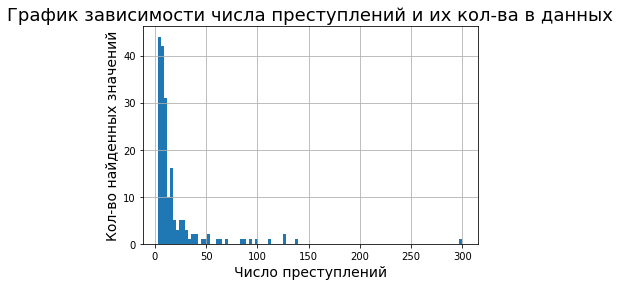

In [41]:
plt.title('График зависимости числа преступлений и их кол-ва в данных', fontsize=18);
plt.ylabel('Кол-во найденных значений', fontsize=14);
plt.xlabel('Число преступлений', fontsize=14);
df['amount of victims'].hist(bins=100);

По графику видим, наибольшое "скопление" данных в диапозоне до 50. преступлений. Разобьем все данные на 4 категории. меньше 10, от 10 до 25, 25-50, и "выбросы" - когда кол-во преступлений более 100.

In [42]:
df['victims_<10'] = np.where(df['amount of victims'] < 10, 1, 0)
df['victims_10_25'] = np.where((df['amount of victims'] < 25) & (df['amount of victims'] >= 10) , 1, 0)
df['victims_25_50'] = np.where((df['amount of victims'] < 50) & (df['amount of victims'] >= 25) , 1, 0)
df['victims_>50'] = np.where(df['amount of victims'] >= 50, 1, 0)
df.drop(['amount of victims'], axis=1, inplace=True);

In [43]:
df.head()

,age of victim,gender of the victim,age of the criminal,criminal education,m.s. criminal,type_cr,psychotype_cr,psycho_cr,gender_cr,profession_cr,...,motive_others,place_city,place_village,place_home,place_street,place_others,victims_<10,victims_10_25,victims_25_50,victims_>50
0,от 15 до 30,мж,30,среднее,нет,меркантильный,социально дезадаптивный,нет,м,нет,...,0,1,0,0,0,0,0,0,0,1
1,"от 0,2 до 11",мж,23,среднее профессиональное,нет,властолюбец,социально дезадаптивный,сильное,ж,медсестра,...,1,0,0,0,0,1,1,0,0,0
2,от 13 до 20,ж,20,среднее профессиональное,нет,гедонист,социально адаптивный,среднее,м,"грузчик, военнослужащий",...,0,1,0,0,0,0,0,1,0,0
3,от 7 до 40,мж,18-30,начальное,нет,властолюбец,социально дезадаптивный,среднее,м,нет,...,0,0,0,0,1,0,0,0,0,1
4,от 10 до 11,ж,неизвестно,неизвестно,неизвестно,гедонист,социально адаптивный,сильное,м,неизвестно,...,0,1,0,0,0,0,1,0,0,0


Следующий признак возраст жертв. Преобразуем данные на минимальный и максимальный возраст жертв

In [44]:
describe_counter(df['age of victim'])

value: от 18 ,count: 12
value: от 17 ,count: 7
value: от 16 ,count: 5
value: от 20 ,count: 4
value: от 15 ,count: 3
value: от 14 ,count: 3
value: от 18 до 40 ,count: 3
value: от 60 ,count: 2
value: от 11 ,count: 2
value: от 23 ,count: 2
остальное:
от 30,от 13 до 34,от 15 до 31,от 14 до 18,от 20 до 35,от 15 до 42,от 18 до 22,от 15 до 55,от 16 до 30,неизвестно,от 17 до 27,от 15 до 30,от 0,2 до 11,от 13 до 20,от 7 до 40,от 10 до 11,от 8 до 13,от 15 ,от 22,от 8 ,от 10 до 14,от 19 до 53,от 69 до 70,от 66 до 82,от 57 до 96,от 3 до 5,от 11 до 20,от 12,от 8,от 6 до 16,от 18 до 20,от 33 до 45,от 29 до 81,от 15 до 36,от 0,2 до 3,от 12 до 16,от 0,от 6 до 19,от 15 до 20,от 2 до 10,от 13 до 27,от 9 до 40,от 19 до 85,от 20 до 44,от 15 дл 25,от 22 до 47,от 22 до 30,от 19 до 51,от 34 до 58,от 31 до 43,от 65 до 97,от 22 до 36,от 15 до 25,от 9 до 16,от 9 до 22,от 55,от 16 до 66,от 7 до 12,от 8 до 77,от 3 до 49,от 12 до 70,от 21 до 22,от 14 до 44,от 10,от 5 до 17,от 12 до 74,от 17 до 32,от 25,от 21 до 52

Поменяем значение "15" на "от 15". Также заменим значение "неизвестно" на самое популярное значение "от 18". Распарсим значения в два фича. от и до 

In [45]:
df.loc[df['age of victim'] == '15', 'age of victim'] = 'от 15'
df.loc[df['age of victim'] == 'неизвестно', 'age of victim'] = 'от 18'
df.loc[df['age of victim'] == 'от 0,2 до 11', 'age of victim'] = 'от 2 до 11'

In [46]:
describe_counter(df['age of victim'])

value: от 18 ,count: 14
value: от 17 ,count: 7
value: от 16 ,count: 5
value: от 20 ,count: 4
value: от 15 ,count: 3
value: от 14 ,count: 3
value: от 18 до 40 ,count: 3
value: от 60 ,count: 2
value: от 11 ,count: 2
value: от 23 ,count: 2
остальное:
от 30,от 13 до 34,от 15 до 31,от 14 до 18,от 20 до 35,от 15 до 42,от 18 до 22,от 15 до 55,от 16 до 30,от 17 до 27,от 15 до 30,от 2 до 11,от 13 до 20,от 7 до 40,от 10 до 11,от 8 до 13,от 15 ,от 22,от 8 ,от 10 до 14,от 19 до 53,от 69 до 70,от 66 до 82,от 57 до 96,от 3 до 5,от 11 до 20,от 12,от 8,от 6 до 16,от 18 до 20,от 33 до 45,от 29 до 81,от 15 до 36,от 0,2 до 3,от 12 до 16,от 0,от 6 до 19,от 15 до 20,от 2 до 10,от 13 до 27,от 9 до 40,от 19 до 85,от 20 до 44,от 15 дл 25,от 22 до 47,от 22 до 30,от 19 до 51,от 34 до 58,от 31 до 43,от 65 до 97,от 22 до 36,от 15 до 25,от 9 до 16,от 9 до 22,от 55,от 16 до 66,от 7 до 12,от 8 до 77,от 3 до 49,от 12 до 70,от 21 до 22,от 14 до 44,от 10,от 5 до 17,от 12 до 74,от 17 до 32,от 25,от 21 до 52,от 39 до 79,

Напишем функцию, которая разделяет возраст жертв преступника в две категории "от" и "до"

In [47]:
array = list(df['age of victim'].values)
ot_ = []
do_ = []
for v in array:
  v = v.replace(' ','')
  if 'от' in v:
    ind = v.find('т')
    if v[ind+1: ind+3].isdigit():
      ot_.append(int(v[ind+1: ind+3]))
    elif v[ind+1: ind+2].isdigit():
      ot_.append(int(v[ind+1: ind+2]))
  else:
    ot_.append(np.NaN)
  if 'до' in v:
    ind = v.find('д') + 1
    if v[ind+1: ind+3].isdigit():
      do_.append(int(v[ind+1: ind+3]))
    elif v[ind+1: ind+2].isdigit():
      do_.append(int(v[ind+1: ind+2]))
    else:
      do_.append(np.NaN)
  else:
    do_.append(np.NaN)

In [48]:
df['age_ot'] = ot_
df['age_do'] = do_

In [49]:
df['age_do'].value_counts()

40.0    8
30.0    7
22.0    7
20.0    5
27.0    4
       ..
74.0    1
81.0    1
10.0    1
77.0    1
96.0    1
Name: age_do, Length: 64, dtype: int64

Решим вопрос с пропущенными значениями в графе до. поменяем их на медиану признака. 

In [50]:
print(f'Кол-во пропущенных значений: {df["age_do"].isna().sum()}')
df['age_do'] = df['age_do'].fillna(df['age_do'].median())
print(f'update: Кол-во пропущенных значений: {df["age_do"].isna().sum()}')
df.drop(['age of victim'], axis=1, inplace=True)

Кол-во пропущенных значений: 56
update: Кол-во пропущенных значений: 0


Рассмотрим следующий признак пол жертвы.

In [51]:
describe_counter(df['gender of the victim'])

value: ж ,count: 86
value: мж ,count: 77
value: м ,count: 22
------------------------
неизвестных значений нет


Данный фич имеет только 3 различных значения. Для кодировки воспользуемся решением из коробки "get_dummies"

In [52]:
new_df = pd.get_dummies(df['gender of the victim'], )

new_df = new_df.rename(columns={'ж':'Female',
                       'м':'Male',
                       'мж':'FM'})
df = pd.concat([df, new_df], axis=1)
df.drop('gender of the victim', axis=1, inplace=True)
df.head()

,age of the criminal,criminal education,m.s. criminal,type_cr,psychotype_cr,psycho_cr,gender_cr,profession_cr,weapon_hands,weapon_cold,...,place_others,victims_<10,victims_10_25,victims_25_50,victims_>50,age_ot,age_do,Female,Male,FM
0,30,среднее,нет,меркантильный,социально дезадаптивный,нет,м,нет,1,0,...,0,0,0,0,1,15,30.0,0,0,1
1,23,среднее профессиональное,нет,властолюбец,социально дезадаптивный,сильное,ж,медсестра,0,0,...,1,1,0,0,0,2,11.0,0,0,1
2,20,среднее профессиональное,нет,гедонист,социально адаптивный,среднее,м,"грузчик, военнослужащий",1,0,...,0,0,1,0,0,13,20.0,1,0,0
3,18-30,начальное,нет,властолюбец,социально дезадаптивный,среднее,м,нет,1,0,...,0,0,0,0,1,7,40.0,0,0,1
4,неизвестно,неизвестно,неизвестно,гедонист,социально адаптивный,сильное,м,неизвестно,1,0,...,0,1,0,0,0,10,11.0,1,0,0


Следующий, один из наиболее важных признаков, на которые будем обучать нашу сеть - возраст преступника. Посмотрим распределение возраста преступника, и попробуем разбить на возрастные подгруппы.

In [53]:
describe_counter(df['age of the criminal'])

value: неизвестно ,count: 11
value: 35 ,count: 6
value: 30 ,count: 4
value: 28 ,count: 3
value: 31 ,count: 3
value: 38 ,count: 3
value: 23 ,count: 2
value: 29-32 ,count: 2
value: 27-32 ,count: 2
value: 23-29 ,count: 2
остальное:
20-26,33,32-34,24-36,33-42,30-31,20-23,27-33,28-30,31-33,22,32-33,26,24-31,19,40,18,26-28,29,32,20,18-30,28-37,49-55,20-21,34-43,26-34,42-46,15-19,51,38-42,21,45,14,17,36,40-48,17-33,34-37,30-36,29-37,28-34,33-34,32-42,43,28-56,10-16,38-59,50,18-20,30-40,40-60,18-31,36-45,31-41,30 и 32,20-40,41-64,24-34,20-31,40-41,58,25-37,31-32,41-42,26-30,27-28,19-23,19-22,66-74,29-34,29-31,18-32,35-46,41-43,26-27,23-45,37-39,25-26,38-45,41-44,27-38,13-30,25-28,32-48,23-25,46-50,52,49-51,14-23,34-39,23-24,23-26,25 - 75,30-35,46-47,39,45-48,16-42,42-51,37-38,39-41,38-40,25,27,23-31,30-65,38-48,34-36,26-38,16-27,20 - 31,17-25,39-40,52-56,38-39,21-32,23-32,28-53,45-54,32-35,36-50,51-57,14-36,33-37,34-38,35-37
------------------------
есть неизвестные значения


Обработуем возраста преступников, с возрастным промежутком преступника и возмем средние значения.

In [54]:
array = list(df['age of the criminal'].values)
age = []
do_ = []
for v in array:
  v = v.replace(' ','')
  if v == 'неизвестно':
    age.append(np.NaN)
  elif '-' in v:
    s,f = v.split('-')
    age.append((int(s) + int(f)) / 2)
  elif 'и' in v:
    s,f = v.split('и')
    age.append((int(s) + int(f)) / 2)
  else:
    age.append(int(v))

In [55]:
df['age_cr'] = age
df.drop('age of the criminal', axis=1, inplace=True)

У нас были неизвестные значения. Поменяем их на медианну данных, и построим график зависимости "возраст - кол-во преступников"

In [56]:
print(f"Кол-во пропущенных значений: {df['age_cr'].isna().sum()}")
df['age_cr'] = df['age_cr'].fillna(df['age_cr'].median())
print(f"update: Кол-во пропущенных значений: {df['age_cr'].isna().sum()}")

Кол-во пропущенных значений: 11
update: Кол-во пропущенных значений: 0


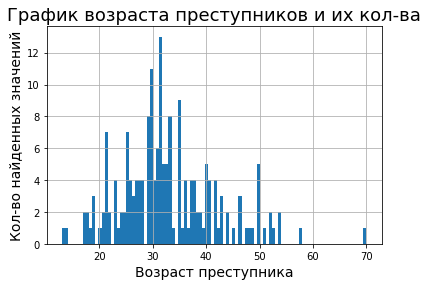

In [57]:
plt.title('График возраста преступников и их кол-ва', fontsize=18);
plt.ylabel('Кол-во найденных значений', fontsize=14);
plt.xlabel('Возраст преступника', fontsize=14);
df['age_cr'].hist(bins=100);

Данные распределены неравномерно. Создадим следующие возрастные категории: 
10-20, 20-30, 30-40, 40-50, 50-60 и т.д.

In [58]:
df['age_cr'] = df['age_cr'] // 10 - 1
df['age_cr'] = df['age_cr'].astype(int)
df['age_cr'].value_counts()

2    81
1    55
3    27
4    11
0    10
6     1
Name: age_cr, dtype: int64

Заметим, что существует категория 6 - состоящая из 1 человека. Определим его в 5ую категорию (самая возрастная)

In [59]:
df.loc[df['age_cr'] == 6, 'age_cr'] = 1
df['age_cr'].value_counts()

2    81
1    56
3    27
4    11
0    10
Name: age_cr, dtype: int64

Следующий признак - образование преступников

In [60]:
describe_counter(df['criminal education'])

value: среднее ,count: 56
value: нет ,count: 49
value: начальное ,count: 34
value: высшее ,count: 19
value: среднее профессиональное ,count: 14
value: неизвестно ,count: 11
value: среднее неоконченное ,count: 1
value: среднее  ,count: 1
------------------------
есть неизвестные значения


Разобьем данные на категории по образованию: среднее, начальное, высшее, отсутствует. Если нет данных об образование, предположим, что образование отсутствует.
Создадим результрующий признак, в котором будет 4 категории образование:
0 - среднее, 1 - начальное, 2 - высшее, 3 - без образования

In [61]:
df['cr_ed'] = df['criminal education'].str.find('среднее')
df['cr_ed'] = np.where(df['cr_ed'] != -1, 1, 0)

df['start_ed'] = df['criminal education'].str.find('начальное')
df['start_ed'] = np.where(df['start_ed'] != -1, 1, 0)

df['high_ed'] = df['criminal education'].str.find('высшее')
df['high_ed'] = np.where(df['high_ed'] != -1, 1, 0)

df['no_ed_1'] = df['criminal education'].str.find('неизвестно')
df['no_ed_1'] = np.where(df['no_ed_1'] != -1, 1, 0)
df['no_ed_2'] = df['criminal education'].str.find('нет')
df['no_ed_2'] = np.where(df['no_ed_2'] != -1, 1, 0)
df['no_ed_'] = df['no_ed_1'] + df['no_ed_2']
df.drop(['no_ed_1', 'no_ed_2', 'criminal education'], axis=1, inplace=True)
df['ed_cr'] = 0
df['ed_cr'] = np.where(df['cr_ed'] == 1, 0, df['ed_cr'])
df['ed_cr'] = np.where(df['start_ed'] == 1, 1, df['ed_cr'])
df['ed_cr'] = np.where(df['high_ed'] == 1, 2, df['ed_cr'])
df['ed_cr'] = np.where(df['no_ed_'] == 1, 3, df['ed_cr'])
df.drop(['cr_ed', 'start_ed', 'high_ed', 'no_ed_'],axis=1, inplace=True)

Следующий признак - семейный статус преступника

In [62]:
describe_counter(df['m.s. criminal'])

value: нет ,count: 114
value: брак ,count: 58
value: неизвестно ,count: 7
value: гр. брак ,count: 5
value: да ,count: 1
------------------------
есть неизвестные значения


Сделаем бинарный признак: 1 - будет означать женат, 0 - нет. Все неизвестнные значения поменяем на 0.

In [63]:
df['m.s_cr'] = df['m.s. criminal'].str.find('а')
df['m.s_cr']  = np.where(df['m.s_cr']  != -1, 1, 0)
df['m.s_cr'].value_counts()
df.drop(['m.s. criminal'], axis=1, inplace=True)

Следующий важные признаки - тип преступника и психологический тип преступника.

In [64]:
describe_counter(df['type_cr'])

value: гедонист ,count: 112
value: меркантильный ,count: 29
value: властолюбец ,count: 17
value: визионер ,count: 14
value: миссионер ,count: 13
value: каннибал ,count: 3
value: неизвестно ,count: 1
value: меркантильность ,count: 1
------------------------
есть неизвестные значения


Создадим аналогично признаку семейного положения два бинарных признака. Является ли он гедонистом или меркантильный. (Выбор основан на данных двух характеристиках по наибольшей популярности типа преступника)


In [65]:
df['type_gedonist'] = df['type_cr'].str.find('гедонист')
df['type_gedonist']  = np.where(df['type_gedonist']  != -1, 1, 0)

df['type_merkantilnii'] = df['type_cr'].str.find('меркантильн')
df['type_merkantilnii']  = np.where(df['type_merkantilnii']  != -1, 1, 0)

df.drop(['type_cr'], axis=1, inplace=True)

In [66]:
describe_counter(df['psychotype_cr'])

value: социально дезадаптивный ,count: 98
value: социально адаптивный ,count: 84
value: социальное дезадаптивный ,count: 1
value: неизвестно ,count: 1
value: социаьно адаптивный ,count: 1
------------------------
есть неизвестные значения


Снова преобразуем в 2 бинарных значения: 1 - адаптивный, 2 - дезадаптивный.

In [67]:
df['adapt/dezapt'] = 0
df.loc[df['psychotype_cr'] == "социально адаптивный", 'adapt/dezapt'] = 1
df.loc[df['psychotype_cr'] == "социаьно адаптивный", 'adapt/dezapt'] = 1
df.drop(['psychotype_cr'], axis=1, inplace=True)

Рассмотрим следующий признак - наличие психологического расстройства у преступника

In [68]:
describe_counter(df['psycho_cr'])

value: нет ,count: 64
value: сильное ,count: 58
value: среднее ,count: 58
value: неизвестно ,count: 5
------------------------
есть неизвестные значения


Закодируем признак по приниципу:
0 - нету расстройства,
1 - среднее,
2 -сильное расстройство.

In [69]:
df['psycho_r'] = 0
df.loc[df['psycho_cr'] == "сильное", 'psycho_r'] = 2
df.loc[df['psycho_cr'] == "среднее", 'psycho_r'] = 1
df.drop(['psycho_cr'], axis=1, inplace=True)

Второй важный признак, на который будет обучаться нейросеть - пол преступника. 
Рассмотрим значения данного признака, и закодируем по принципу one_hot_encoding

In [70]:
describe_counter(df['gender_cr'])
df['gender_cr'] = df['gender_cr'].str.replace(' ', '')
print()
print('UPDATE')
describe_counter(df['gender_cr'])

value: м ,count: 166
value: ж ,count: 16
value: м  ,count: 3
------------------------
неизвестных значений нет

UPDATE
value: м ,count: 169
value: ж ,count: 16
------------------------
неизвестных значений нет


In [71]:
new_df = pd.get_dummies(df['gender_cr'])
df = pd.concat([df, new_df], axis=1)
df.drop('gender_cr', axis=1, inplace=True)


In [72]:
df = df.rename({'м': 'Sex'},axis=1)
df.drop('ж', axis=1, inplace=True)


In [73]:
df.head()

,profession_cr,weapon_hands,weapon_cold,weapon_fire,weapon_core,weapon_others,type_rape,type_robbery,type_murder,type_others,...,Male,FM,age_cr,ed_cr,m.s_cr,type_gedonist,type_merkantilnii,adapt/dezapt,psycho_r,Sex
0,нет,1,0,0,0,0,0,1,1,0,...,0,1,2,0,0,0,1,0,0,1
1,медсестра,0,0,0,0,1,0,0,1,0,...,0,1,1,0,0,0,0,0,2,0
2,"грузчик, военнослужащий",1,0,0,0,0,1,0,1,0,...,0,0,1,0,0,1,0,1,1,1
3,нет,1,0,0,0,0,1,0,1,0,...,0,1,1,1,0,0,0,0,1,1
4,неизвестно,1,0,0,0,0,1,0,1,0,...,0,0,2,3,0,1,0,1,2,1


Наличие 1 в признаке пола - означает что преступник является мужщиной, 0 - девушкой. Последний признак профессия преступника. Рассмотрим входные значения признака.

In [74]:
describe_counter(df['profession_cr'])

value: нет ,count: 73
value: военный ,count: 12
value: неизвестно ,count: 9
value: медсестра ,count: 6
value: автослесарь ,count: 5
value: фермер ,count: 4
value: рабочий ,count: 4
value: низкоквалифицированный труд ,count: 4
value: фотограф ,count: 3
value: продавец ,count: 3
остальное:
автомеханик,грузчик,сиделка,психолог,бизнесмен,пожарный,сутенер,солдат,электрик,строитель,преприниматель,разнорабочий,слесарь,военнослужащий,дальнобойщик,педагог,сварщик,футболист,служанка,владелец магазина,клоун,художник,воспитатель,подмастерье,стекольщик,зоотехник,предприниматель,врач,кондитер,курьер,полицейский,органист,работник склада,секс-работник,шофер,натурщик,лаборант,матрос,инженер-радиотехник,милиционер,тракторист,водитель,посудомойка,театр,охранник,сезонный рабочий,няня,дровосек,жокей,психиатр,таксист,пристрельщик,бухгалтер,каменщик,дорожный разметчик,работник почты,секретарь,пекарь,автомойщик,батрак,кучер,инженер,жестянщик,оператор котельной,работник фастфуда,журналист,пиццерия,учитель
----

Около 50% неизвестных значений. Удалим данные фич, чтобы не портить входные данные. 

In [75]:
df = df.drop('profession_cr', axis=1)
df.head()

,weapon_hands,weapon_cold,weapon_fire,weapon_core,weapon_others,type_rape,type_robbery,type_murder,type_others,motive_sex,...,Male,FM,age_cr,ed_cr,m.s_cr,type_gedonist,type_merkantilnii,adapt/dezapt,psycho_r,Sex
0,1,0,0,0,0,0,1,1,0,0,...,0,1,2,0,0,0,1,0,0,1
1,0,0,0,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,0,2,0
2,1,0,0,0,0,1,0,1,0,1,...,0,0,1,0,0,1,0,1,1,1
3,1,0,0,0,0,1,0,1,0,1,...,0,1,1,1,0,0,0,0,1,1
4,1,0,0,0,0,1,0,1,0,1,...,0,0,2,3,0,1,0,1,2,1


Мы предобработали данные для входа нейронной сети. Теперь преступим к написанию самой нейронной сети, которая на основе входных данных будет предсказывать ответы. Для этого мы будем использовать обучение с учителем - отдадим часть данных сети для обучения, а на другой части, которую сеть видеть не будет- будем предсказывать результат. Сверяя правильные значения с предсказанными будем считать ошибку, и корректировать веса нашей сети. Для создания сети будем использовать библиотеку PyTorch. 

Разделим наши данные на три категории: данные которые нам не понадобятся, данные которые мы будем предсказывать, и данные которые нам будут известы. 
Известные данные о преступлениях - орудие преступления, тип преступления, способ преступления, обстановка, возраст и пол жертвы. На выходе будем предсказывать данные о преступнике - возраст, пол, образование и семейный статус. 

In [76]:
df.columns

Index(['weapon_hands', 'weapon_cold', 'weapon_fire', 'weapon_core',
       'weapon_others', 'type_rape', 'type_robbery', 'type_murder',
       'type_others', 'motive_sex', 'motive_benefit', 'motive_psyche',
       'motive_others', 'place_city', 'place_village', 'place_home',
       'place_street', 'place_others', 'victims_<10', 'victims_10_25',
       'victims_25_50', 'victims_>50', 'age_ot', 'age_do', 'Female', 'Male',
       'FM', 'age_cr', 'ed_cr', 'm.s_cr', 'type_gedonist', 'type_merkantilnii',
       'adapt/dezapt', 'psycho_r', 'Sex'],
      dtype='object')

In [77]:
df.drop(['motive_sex', 'motive_benefit', 'motive_psyche',
       'motive_others', 'victims_<10', 'victims_10_25',
       'victims_25_50', 'victims_>50','type_gedonist', 'type_merkantilnii',
       'adapt/dezapt', 'psycho_r', 'age_do' ], axis=1, inplace=True)

In [78]:
df.columns

Index(['weapon_hands', 'weapon_cold', 'weapon_fire', 'weapon_core',
       'weapon_others', 'type_rape', 'type_robbery', 'type_murder',
       'type_others', 'place_city', 'place_village', 'place_home',
       'place_street', 'place_others', 'age_ot', 'Female', 'Male', 'FM',
       'age_cr', 'ed_cr', 'm.s_cr', 'Sex'],
      dtype='object')

In [79]:
from sklearn.preprocessing import LabelEncoder
import torch
import torch.nn as nn
from sklearn.model_selection import train_test_split
import random

Разделим наши данные на матрицу признаков - Х, на основе которой будут предсказываться значения,
а так-же создадим два вектора значений, к-ые будут предсказываться - возраст и пол преступника

In [80]:
y_age = df['age_cr']
y_sex = df['Sex']
y_ed = df['ed_cr']
y_ms = df['m.s_cr']
X = df.drop(['age_cr', 'Sex', 'ed_cr', 'm.s_cr'], axis=1)

In [81]:
torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
device

device(type='cpu')

Разделим наши данные тренировочные и тестовые. на тренировочных наша сеть будет обучаться, и предсказывать значения на тестовых.

In [82]:
X_train, X_test,y_train_sex, y_test_sex, y_train_age, y_test_age, y_train_ed, y_test_ed, y_train_ms, y_test_ms = \
 train_test_split(X, y_sex, y_age, y_ed, y_ms,  test_size = 0.2, shuffle= True) 
X_train = torch.FloatTensor(X_train.values)
X_test = torch.FloatTensor(X_test.values)

y_train_sex = torch.FloatTensor(y_train_sex.values)
y_test_sex= torch.FloatTensor(y_test_sex.values)

y_train_age = torch.FloatTensor(y_train_age.values)
y_test_age= torch.FloatTensor(y_test_age.values)

y_train_ed= torch.FloatTensor(y_train_ed.values)
y_test_ed= torch.FloatTensor(y_test_ed.values)

y_train_ms = torch.FloatTensor(y_train_ms.values)
y_test_ms= torch.FloatTensor(y_test_ms.values)

Создадим первую нейросеть. На входе будет кол-во нейронов равное число признаков из датафрейма. Далее у нас будет один скрытый слой, и на выходе слой с 2 мя нейронами. Активация которых будет происходить от выбора пола нейросетью.

In [83]:
class NeuralNetworkSex(nn.Module):
    def __init__(self, first_neurons, n_hidden_neurons):
        super().__init__()
        self.fc1 = nn.Linear(first_neurons, n_hidden_neurons)
        self.activ1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
      
        x = self.fc2(x)
        x = self.activ2(x)
        
        x = self.fc3(x)
        return x 
      
myNet = NeuralNetworkSex(X_train.shape[1], 144)
myNet = myNet.to(device)
myNet.parameters()
# list(myNet.parameters())
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(myNet.parameters(),  lr = 10 **(-4))

X_test = X_test.to(device)
y_test_sex = y_test_sex.to(device)

Напишем процесс обучения нейросети. Обучения будет происходить батчами (частями). Мы проходим по батчу, считаем общую ошибку, и возвращаем градиент. Так проходим эпохи (Эпоха - полный проход по данным из тренировочной части датасэта) Далее предсказываем данные на тестовой выборке и оцениваем результат с помощью метрики "accuracy".

In [84]:
acc = []
losss = []
def training(model, batch_size, epochs, loss, optimizer):
    for epoch in range(epochs):
        order = np.random.permutation(len(X_train))
        for start_ind in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_ind:start_ind + batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train_sex[batch_indexes].to(device)

            preds = model.forward(X_batch)
            loss_value = loss(preds, y_batch.long())
            loss_value.backward()
            optimizer.step()

        test_preds = model.forward(X_test)
        losss.append(loss(test_preds, y_test_sex.long()).to('cpu').item())

        accuracy = (test_preds.argmax(dim=1) == y_test_sex).float().mean().to('cpu')
        acc.append(accuracy)
        if (epoch + 1) % 20 == 0:
            print(f'epoch: {epoch + 1}, acc:{accuracy}')

Проведем обучение нашей сети и построим график зависимости точности от эпохи

In [85]:
epoch = 200
batch_size = 32
training(myNet, batch_size, epoch, loss, optimizer)

epoch: 20, acc:0.9189189076423645
epoch: 40, acc:0.8918918967247009
epoch: 60, acc:0.8918918967247009
epoch: 80, acc:0.8918918967247009
epoch: 100, acc:0.8918918967247009
epoch: 120, acc:0.9189189076423645
epoch: 140, acc:0.9189189076423645
epoch: 160, acc:0.8918918967247009
epoch: 180, acc:0.8918918967247009
epoch: 200, acc:0.9189189076423645


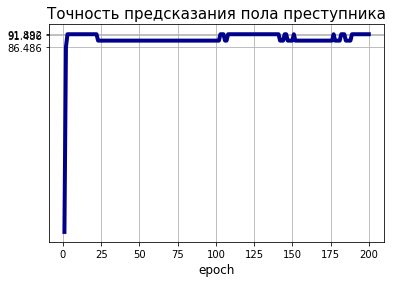

In [86]:
x = np.arange(1,201)
y_v = np.array(acc) * 100
max_value = y_v.max().reshape(-1)
y_values = np.array(acc) * 100
y_ticks =   np.concatenate((np.arange(y_v[1:].min(), y_v.max(), 5), max_value),axis = 0)
plt.plot(x, y_v,  color ='darkblue', linewidth=4)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='-')
plt.grid(axis='x', linestyle='-')
plt.title('Точность предсказания пола преступника', fontsize = 15 );
plt.xlabel('epoch', fontsize=12);
plt.show();

Точность нашей нейросети равна более 80%. Как мы видим, и при большем количестве эпох наша сеть даёт такие же результаты, что говорит о выходе на плато, и отсутствием переобучения

Создадим аналогичную сеть для оценки возрастной категории преступника, на основе его характеристики

In [87]:
class NeuralNetworkAge(nn.Module):
    def __init__(self, first_neurons, n_hidden_neurons):
        super().__init__()
        self.fc1 = nn.Linear(first_neurons, n_hidden_neurons)
        self.activ1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons, n_hidden_neurons // 2)
        self.activ3 = nn.ReLU()

        self.fc4 = nn.Linear(n_hidden_neurons // 2, 5)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
      
        x = self.fc2(x)
        x = self.activ2(x)
        
        x = self.fc3(x)
        x = self.activ3(x)

        x = self.fc4(x)
        return x 

In [88]:
myNet = NeuralNetworkAge(X_train.shape[1], 48)
myNet = myNet.to(device)
myNet.parameters()
# list(myNet.parameters())
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(myNet.parameters(),  lr = 10 **(-4))

X_test = X_test.to(device)
y_test_age = y_test_age.to(device)

acc = []
losss = []
def training(model, batch_size, epochs, loss, optimizer):
    for epoch in range(epochs):
        order = np.random.permutation(len(X_train))
        for start_ind in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_ind:start_ind + batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train_age[batch_indexes].to(device)

            preds = model.forward(X_batch)
            loss_value = loss(preds, y_batch.long())
            loss_value.backward()
            optimizer.step()

        test_preds = model.forward(X_test)
        losss.append(loss(test_preds, y_test_age.long()).to('cpu').item())
        accuracy = (test_preds.argmax(dim=1) == y_test_age ).float().mean().to('cpu')
        acc.append(accuracy)
        if (epoch + 1) % 5 == 0:
            print(f'epoch: {epoch + 1}, acc:{accuracy}')

In [89]:
epoch = 100
batch_size = 32
training(myNet, batch_size, epoch, loss, optimizer)

epoch: 5, acc:0.29729729890823364
epoch: 10, acc:0.29729729890823364
epoch: 15, acc:0.29729729890823364
epoch: 20, acc:0.29729729890823364
epoch: 25, acc:0.29729729890823364
epoch: 30, acc:0.29729729890823364
epoch: 35, acc:0.29729729890823364
epoch: 40, acc:0.29729729890823364
epoch: 45, acc:0.29729729890823364
epoch: 50, acc:0.29729729890823364
epoch: 55, acc:0.3513513505458832
epoch: 60, acc:0.3513513505458832
epoch: 65, acc:0.37837839126586914
epoch: 70, acc:0.37837839126586914
epoch: 75, acc:0.37837839126586914
epoch: 80, acc:0.37837839126586914
epoch: 85, acc:0.4324324429035187
epoch: 90, acc:0.4324324429035187
epoch: 95, acc:0.4324324429035187
epoch: 100, acc:0.4324324429035187


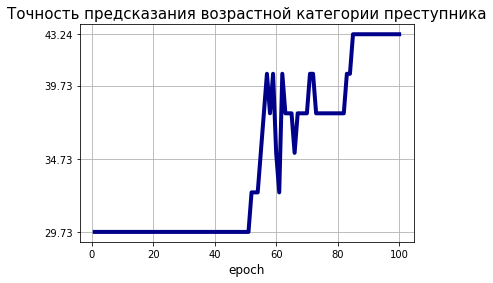

In [90]:
x = np.arange(1,101)
y_v = np.array(acc) * 100
max_value = y_v.max().reshape(-1)
y_values = np.array(acc) * 100
y_ticks =   np.concatenate((np.arange(y_v[1:].min(), y_v.max(), 5), max_value),axis = 0)
plt.plot(x, y_v,  color ='darkblue', linewidth=4)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='-')
plt.grid(axis='x', linestyle='-')
plt.title('Точность предсказания возрастной категории преступника', fontsize = 15 );
plt.xlabel('epoch', fontsize=12);
plt.show();

Результаты нашей сети не идеальны. Наша сеть может верно Предсказать категорию преступника только в 50% случаев. Это гораздо лучше, чем выбор наугад. Вероятность правильно ответа наугад 20%

Нейросеть для предсказания образования преступника.

In [91]:
class NeuralNetworkEd(nn.Module):
    def __init__(self, first_neurons, n_hidden_neurons):
        super().__init__()
        self.fc1 = nn.Linear(first_neurons, n_hidden_neurons)
        self.activ1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons, n_hidden_neurons // 2)
        self.activ3 = nn.ReLU()

        self.fc4 = nn.Linear(n_hidden_neurons // 2, 4)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
      
        x = self.fc2(x)
        x = self.activ2(x)
        
        x = self.fc3(x)
        x = self.activ3(x)

        x = self.fc4(x)
        return x  
      
myNet = NeuralNetworkEd(X_train.shape[1], 72)
myNet = myNet.to(device)
myNet.parameters()
# list(myNet.parameters())
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(myNet.parameters(),  lr = 10 **(-4))

X_test = X_test.to(device)
y_test_ed = y_test_ed.to(device)

In [92]:
acc = []
losss = []
def training(model, batch_size, epochs, loss, optimizer):
    for epoch in range(epochs):
        order = np.random.permutation(len(X_train))
        for start_ind in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_ind:start_ind + batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train_ed[batch_indexes].to(device)

            preds = model.forward(X_batch)
            loss_value = loss(preds, y_batch.long())
            loss_value.backward()
            optimizer.step()

        test_preds = model.forward(X_test)
        losss.append(loss(test_preds, y_test_ed.long()).to('cpu').item())

        accuracy = (test_preds.argmax(dim=1) == y_test_ed).float().mean().to('cpu')
        acc.append(accuracy)
        if (epoch + 1) % 20 == 0:
            print(f'epoch: {epoch + 1}, acc:{accuracy}')


epoch = 200
batch_size = 32
training(myNet, batch_size, epoch, loss, optimizer)

epoch: 20, acc:0.37837839126586914
epoch: 40, acc:0.37837839126586914
epoch: 60, acc:0.4054054021835327
epoch: 80, acc:0.4054054021835327
epoch: 100, acc:0.37837839126586914
epoch: 120, acc:0.3243243098258972
epoch: 140, acc:0.29729729890823364
epoch: 160, acc:0.29729729890823364
epoch: 180, acc:0.3513513505458832
epoch: 200, acc:0.37837839126586914


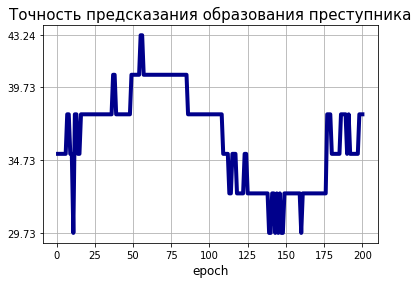

In [93]:
x = np.arange(1,201)
y_v = np.array(acc) * 100
max_value = y_v.max().reshape(-1)
y_values = np.array(acc) * 100
y_ticks =   np.concatenate((np.arange(y_v[1:].min(), y_v.max(), 5), max_value),axis = 0)
plt.plot(x, y_v,  color ='darkblue', linewidth=4)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='-')
plt.grid(axis='x', linestyle='-')
plt.title('Точность предсказания образования преступника', fontsize = 15 );
plt.xlabel('epoch', fontsize=12);
plt.show();

Нейронная сеть для предсказания семейного статуса преступника

In [94]:
class NeuralNetworkMs(nn.Module):
    def __init__(self, first_neurons, n_hidden_neurons):
        super().__init__()
        self.fc1 = nn.Linear(first_neurons, n_hidden_neurons)
        self.activ1 = nn.ReLU()
        self.fc2 = nn.Linear(n_hidden_neurons, n_hidden_neurons)
        self.activ2 = nn.ReLU()
        self.fc3 = nn.Linear(n_hidden_neurons, n_hidden_neurons // 2)
        self.activ3 = nn.ReLU()

        self.fc4 = nn.Linear(n_hidden_neurons // 2, 2)
        
    def forward(self, x):
        x = self.fc1(x)
        x = self.activ1(x)
      
        x = self.fc2(x)
        x = self.activ2(x)
        
        x = self.fc3(x)
        x = self.activ3(x)

        x = self.fc4(x)
        return x  
      
myNet = NeuralNetworkMs(X_train.shape[1], 37)
myNet = myNet.to(device)
myNet.parameters()
# list(myNet.parameters())
loss = torch.nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(myNet.parameters(),  lr = 10 **(-4))

X_test = X_test.to(device)
y_test_ed = y_test_ed.to(device)

In [95]:
acc = []
losss = []
def training(model, batch_size, epochs, loss, optimizer):
    for epoch in range(epochs):
        order = np.random.permutation(len(X_train))
        for start_ind in range(0, len(X_train), batch_size):
            optimizer.zero_grad()
            batch_indexes = order[start_ind:start_ind + batch_size]
            X_batch = X_train[batch_indexes].to(device)
            y_batch = y_train_ms[batch_indexes].to(device)

            preds = model.forward(X_batch)
            loss_value = loss(preds, y_batch.long())
            loss_value.backward()
            optimizer.step()

        test_preds = model.forward(X_test)
        losss.append(loss(test_preds, y_test_ms.long()).to('cpu').item())

        accuracy = (test_preds.argmax(dim=1) == y_test_ms).float().mean().to('cpu')
        acc.append(accuracy)
        if (epoch + 1) % 20 == 0:
            print(f'epoch: {epoch + 1}, acc:{accuracy}')


epoch = 200
batch_size = 32
training(myNet, batch_size, epoch, loss, optimizer)

epoch: 20, acc:0.45945945382118225
epoch: 40, acc:0.5945945978164673
epoch: 60, acc:0.5945945978164673
epoch: 80, acc:0.5945945978164673
epoch: 100, acc:0.5945945978164673
epoch: 120, acc:0.6216216087341309
epoch: 140, acc:0.6216216087341309
epoch: 160, acc:0.6216216087341309
epoch: 180, acc:0.6216216087341309
epoch: 200, acc:0.6216216087341309


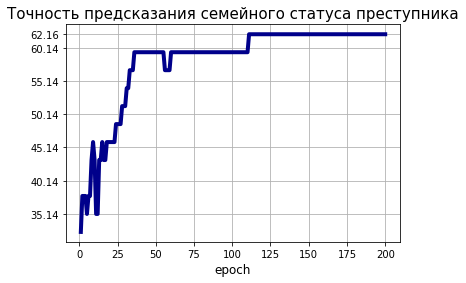

In [96]:
x = np.arange(1,201)
y_v = np.array(acc) * 100
max_value = y_v.max().reshape(-1)
y_values = np.array(acc) * 100
y_ticks =   np.concatenate((np.arange(y_v[1:].min(), y_v.max(), 5), max_value),axis = 0)
plt.plot(x, y_v,  color ='darkblue', linewidth=4)
plt.yticks(y_ticks)
plt.grid(axis='y', linestyle='-')
plt.grid(axis='x', linestyle='-')
plt.title('Точность предсказания семейного статуса преступника', fontsize = 15 );
plt.xlabel('epoch', fontsize=12);
plt.show();